## **Working with dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('./data.xlsx')

# print(df)

In [ ]:
df.sort_index(ascending=False)

In [ ]:
dataframe = {"A col": 1, "B col": [2, 3, 4], "C col": "test"}
data = pd.DataFrame(dataframe)
data.head()

In [ ]:
import numpy as np

data = pd.DataFrame(np.random.randn(4, 6),columns=list("ABCDEF"))
data.head()

In [ ]:
data.rename(columns={"A": "A col", "B": "B col", "C": "C col"}, inplace=True)
data

In [ ]:
data.columns = data.columns.str.replace(" ", "_")
data

In [ ]:
data = data.add_prefix("prefix_")
data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

tips = sns.load_dataset("tips")
tips.columns
tips.to_csv("tips.csv", index=False)
tips.head(-3)


In [ ]:
tips.loc[::-1].reset_index(drop=True).head()

In [ ]:
tips.loc[:, ::-1].head()

In [ ]:
tips.loc[:, ::-1].reset_index(drop=True).head()

In [ ]:
tips.dtypes

In [ ]:
tips.select_dtypes(include=["category", "number"]).head()



In [ ]:
db = sns.load_dataset("titanic")
db.shape

In [ ]:
db.sample(frac=0.5).shape
db.info()

In [ ]:
cb = pd.read_clipboard()
cb

In [ ]:
db.sex.unique()

In [ ]:
isFemale = (db.sex == "female")
db[isFemale]
female_df = db.query("sex == 'female'")
female_df

In [ ]:
condition =  ((db.embark_town == "Southampton") |  (db.embark_town == "Queenstown")) & (db.sex == "female") 
db[condition]

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: >

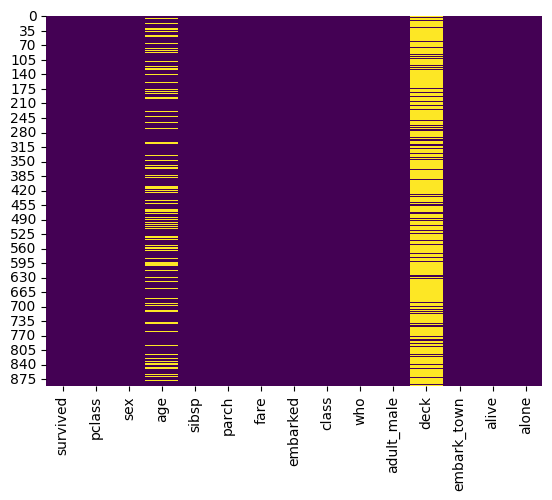

In [22]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")

In [20]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])


In [18]:
df['embark_town'].mode()[0]

'Southampton'

In [23]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [25]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [26]:
df.embark_town.value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [34]:
# find mean fare for sex
df.groupby(["survived", "sex", "who"], observed=False).size()

survived  sex     who  
0         female  child     15
                  woman     66
          male    child     19
                  man      449
1         female  child     28
                  woman    205
          male    child     21
                  man       88
dtype: int64

In [ ]:
correlation_df = df[['fare','age','sibsp',"parch"]].corr()

,fare,age,sibsp,parch
fare,1.000000,0.096067,0.159651,0.216225
age,0.096067,1.000000,-0.308247,-0.189119
sibsp,0.159651,-0.308247,1.000000,0.414838
parch,0.216225,-0.189119,0.414838,1.000000


In [ ]:
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", center=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
